# Cleaning Data in Python

* Link: https://learn.datacamp.com/courses/cleaning-data-in-python

## Course Description

It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions. Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

## Contents

* **Chapter 1**: Common data problems
  * Data type constraints, Data range constraints, Uniqueness constraints
* **Chapter 2**: Text and categorical data problems
  * Membership constraints, Categorical variables, Cleaning text data
* **Chapter 3**: Advanced data problems
  * Uniformity, Cross field validation, Completeness
* **Chapter 4**: Record linkage
  * Comparing strings, Generating pairs, Linking DataFrames

In [3]:
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/16 - Course - Cleaning Data in Python/datasets/'

# Chapter 1: Common data problems
In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

## Data Type Constraints

* str, int, float, bool, datetime, category

* When working with new data, you should always check the data types of your columns using the ```.dtypes``` attribute or the ```.info()``` method.

### The assert statement 

In [1]:
# This will pass
assert 1+1 == 2

# This will not pass
assert 1+1 == 3

AssertionError: ignored

### Using .astype() to convert from integer to category

In [4]:
# Working with bicycle ride sharing data in San Francisco called ride_sharing
import pandas as pd
ride_sharing = pd.read_csv(filepath + 'ride_sharing_new.csv')

print(ride_sharing.info())
print("\n", ride_sharing['user_type'].describe()) # Summary statistics of user_type column

ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category') # Convert user_type from integer to category
assert ride_sharing['user_type_cat'].dtype == 'category' # Confirm new type

# Print new summary statistics 
print("\n", ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None

 count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

 count     25760
unique        3
top           2
freq      12972
Name: user_type_cat,

### Using .astype() to convert from duration to integer

In [5]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


## Data Range Constraints

### How to deal with out of range data?

* Dropping data
* Setting custom minimums and maximums
* Treat as missing and impute
* Setting custom value depending on business assumptions

In [6]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int64   
dtypes: category(1), int64(7), object(5)
memory usage: 2.4+ MB


In [ ]:
# Change 'category' data to 'int', set max value and switch back to 'category' data type
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')   
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27 # Set all values above 27 to 27
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

In [ ]:
# Define column as type 'datetime', set future times to the same datetime as today
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])
today = dt.date.today()
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today # Set all in the future to today's date

## Uniquiness Constraints

* Duplicated values are not desirable

### How to find duplicate values?

In [ ]:
# How to find duplicate values?

# Get duplicates across all columns
column_names = ['first_name','last_name','address']
duplicates = height_weight.duplicated(subset=column_names, keep=False)

# Get duplicate rows sorted
height_weight[duplicates].sort_values(by='first_name')

In [ ]:
# Finding duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')
print(duplicated_rides[['ride_id','duration','user_birth_year']])

### Treating duplicates

In [ ]:
# Treating duplicates

# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby(by='ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# Chapter 2: Text and categorical data problems
Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

## Membership constraints for categorical data

* Predefined finite set of categories

| **Type of data**            | **Example values**                          | **Numeric representation**   |
|:---------------------------:|:-------------------------------------------:|:----------------------------:|
| Marriage Status             | ```unmarried``` , ```married```             | ```0``` , ```1```            |
| Household IncomeCategory    | ```0-20K``` , ```20-40K``` , ```...```      | ```0``` , ```1```, ```...``` |
| Loan Status                 | ```default``` , ```payed``` , ```no_loan``` | ```0``` , ```1```, ```2```   |

Example: Marriage status can only be ```unmarried``` _or_ ```married```

### Why use categories?
* Categories save space in memory
* As shown in the table above, each category has a numeric representation.
* If we had to save each category in each row as a string, we would use much more memory, instead of just using it's numeric representation

### Problems with categorical data
  * Issues with free text vs dropdown fields
  * Data parsing errors
  * Other types of errors

### How do we treatthese problems?
* Drop the rows with incorrect categories
* Try to remap incorrect categories to correct ones

### A note on joins
* Anti Joins: What is in A and not in B
  * A - B => Also called a left-anti join on A, which return only values that belong to A and that are not in B.
* Inner Joins: Return only data contained in both DataFrames
  * A $\cap$ B 
* Example
  * With we have DataFrame ```df``` and categories ```cat``` a left anti-join of ```df``` and ```cat``` on ```df``` would return the categories inside ```df``` that don't belong to ```cat```.
  * Alternatively, an inner join of ```df``` and ```cat``` would return all consistent categories from ```cat``` inside ```df```.

#### Finding inconsistent categories and inconsistent rows

In [ ]:
# Finding inconsistent categories and inconsistent rows
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]

#### Dropping inconsistent categories

In [ ]:
# Dropping inconsistent categories
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
consistent_data = study_data[~inconsistent_rows]

### Exercise - Creating categories

In [11]:
# Exercise - Creating categories
import pandas as pd
rows = ([['Clean', 'Neutral', 'Very satisfied'],
       ['Average', 'Very safe', 'Neutral'],
       ['Somewhat clean', 'Somewhat safe', 'Somewhat satisfied'],
       ['Somewhat dirty', 'Very unsafe', 'Somewhat unsatisfied'],
       ['Dirty', 'Somewhat unsafe', 'Very unsatisfied']])
df_rows = pd.DataFrame(rows, columns=['cleanliness', 'safety', 'satisfaction'])
categories = pd.DataFrame(columns=['cleanliness', 'safety', 'satisfaction'])
categories = categories.append(df_rows, ignore_index=True)

print(categories)

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied


### Exercise - Check unique values

In [12]:
# Exercise - Check unique values
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)
print(airlines)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

        id        day  ...         safety        satisfaction
0     1351    Tuesday  ...        Neutral      Very satisfied
1      373     Friday  ...      Very safe      Very satisfied
2     2820   Thursday  ...  Somewhat safe             Neutral
3     1157    Tuesday  ...      Very safe  Somewhat satsified
4     2992  Wednesday  ...      Very safe  Somewhat satsified
...    ...        ...  ...            ...                 ...
2804  1475    Tuesday  ...        Neutral  Somewhat satsified
2805  2222   Thursday  ...      Very safe      Very satisfied
2806  2684     Friday  ...      Very safe      Very satisfied
2807  2549    Tuesday  ...  Somewhat safe      Very satisfied
2808  2162   Saturday  ...      Very safe  Somewhat satsified

[2477 rows x 12 columns]
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Some

### Exercise - Finding inconsistent data

In [13]:
# Exercise - Finding inconsistent data

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent category
print('\n', airlines[~cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []

         id        day  ...         safety        satisfaction
0     1351    Tuesday  ...        Neutral      Very satisfied
1      373     Friday  ...      Very safe      Very satisfied
2     2820   Thursday  ...  Somewhat safe             Neutral
3     1157    Tuesday  ...      Very safe  Somewhat satsified
4     2992  Wednesday  ...      Very safe  Somewhat satsified
...    ...        ...  ...            ...                 ...
2804  1475    Tuesday  ...        Neutral  Somewhat satsified
2805  2222   Thursday  ...      Very safe      Very satisfied
2806  2684     Friday  ...      Very safe      Very satisfied
2807  2549    Tuesday  ...  Somewhat safe      Very satisfied
2808  2162   Saturday  ...      Very safe  Somewhat satsified

[2477 rows x 12 columns]


## Categorical variables

In this section we will talk about:
* How to address common problems affecting categorical variables in your data
* Problems such as
  * White spaces and Inconsistencies in your categories
    * We can use ```.str.upper()```, ```.str.strip()```, ```.str.lower()```
  * Creating new categories and mapping existing ones to new ones
    * We can use ```pandas.cut()```, ```pandas.qcut()```, ```.replace()```

### What type of errors could we have?

1. **Value inconsistency**
* *Inconsistent fields*: ```'married'``` , ```'Maried'``` , ```'UNMARRIED'``` , ```'not married'```
* *Trailing white spaces*: ```'married '``` , ```' married '```

2. **Collapsing too many categories to few**
* *Creating new groups*: ```0-20K``` , ```20-40K``` categories ... from continuous household income data
* *Mapping groupsto new ones*: Mapping household income categories to 2 ```'rich'``` , ```'poor'```

3. **Making sure data is of type ```category```**

### Value consistency

* *Capitalization*: ```'married'``` , ```'Married'``` , ```'UNMARRIED'``` , ```'unmarried'``` ..

    ```
    # Capitalize
    marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()
    # Lowercase
    marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()
    ```

* *Trailing spaces*: ```'married '``` , ```'married'``` , ```'unmarried'``` , ```' unmarried'``` ..
    ```
    # Strip all spaces
    demographics = demographics['marriage_status'].str.strip()
    ```

### Collapsing data into categories

* *Create categories out of data*: ```income_group``` column from ```income``` column.

#### Collapsing data into categories - Using qcut()

In [ ]:
# Collapsing data into categories - Using qcut()

"""
qcut() : Discretize variable into equal-sized buckets based on rank or based 
on sample quantiles. For example 1000 values for 10 quantiles would produce a 
Categorical object indicating quantile membership for each data point.
"""

import pandas as pd

group_names = ['0-200K', '200K-500K', '500K+']
demographics['income_group'] = pd.qcut(demographics['household_income'], q = 3,
                                       labels = group_names)

#### Collapsing data into categories - Using cut() - Create category ranges and names

In [ ]:
# Collapsing data into categories - Using cut() - Create category ranges and names

"""
cut() : Use cut when you need to segment and sort data values into bins. This function 
is also useful for going from a continuous variable to a categorical variable. For example, 
cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, 
or a pre-specified array of bins.
"""

import pandas as pd

ranges = [0,200000,500000,np.inf]
group_names = ['0-200K', '200K-500K', '500K+']

# Create income group column
demographics['income_group'] = pd.cut(demographics['household_income'], bins=ranges,
                                      labels=group_names)

### (continuing...) Collapsing data into categories

* *Map categories to fewer ones*: reducing categories in categorical column.

  * ```operating_system``` column is (origin set of categories): ```'Microsoft'```, ```'MacOS'```, ```'IOS'```, ```'Android'```, ```'Linux'```
  * ```operating_system``` column should become (destiny set of categories): ```'DesktopOS'```, ```'MobileOS'```

#### Create mapping dictionary and replace

In [ ]:
# Create mapping dictionary and replace
mapping = {'Microsoft':'DesktopOS', 'MacOS':'DesktopOS', 'Linux':'DesktopOS',
           'IOS':'MobileOS', 'Android':'MobileOS'}

devices['operating_system'] = devices['operating_system'].replace(mapping)
devices['operating_system'].unique()

### Exercise - Treating inconsistent categories

In [19]:
# Exercise - Treating inconsistent categories
import pandas as pd
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)

# Inconsistent categories - Capitalization problems
print(airlines['dest_region'].unique()) # Inconsistent 
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
print(airlines['dest_region'].unique()) # Consistent

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


### Exercise - Treating inconsistent categories

In [20]:
# Exercise - Treating inconsistent categories
import pandas as pd
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)

print(airlines['dest_size'].unique()) # Inconsistent
airlines['dest_size'] = airlines['dest_size'].str.strip()
print(airlines['dest_size'].unique()) # Consistent

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['Hub' 'Small' 'Medium' 'Large']


### Exercise - Remapping categories

In [21]:
# Exercise - Remapping categories
import pandas as pd
import numpy as np
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)

"""
column 'day': Categorical. Contains the exact day a flight took place.
column 'wait_min': Numerical. Contains the amount of minutes it took travelers to wait at the gate.

new categories:
* wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
* day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
"""

# 'wait_type' categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
print(airlines['wait_min'].unique())
print(airlines['wait_type'].unique(), '\n')

# 'day_week' categories
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}
airlines['day_week'] = airlines['day'].replace(mappings)
print(airlines['day'].unique())
print(airlines['day_week'].unique())

[ 115.  135.   70.  190.  559.  140.   63.  215.  180.  540.  192.  107.
  155.  175.  100.  225.   60.  145.  210.  160.  604.  205.  510.  270.
  173.   92.  125.  120.  900.  150.  330.  110.  415.   76.  165.  122.
   90.   68.   15.   65.  300.   77.  185.   60.   81.  105.  170.  245.
  355.   85.  177.  130.   50.   32.  103.  240.  305.   75.  235.   95.
  112.  142.   85.  265.   97.  131.  514.   75.   98.  166.   65.  139.
  220.   53.  153.  123.  195.  335.  216.  247.   45.  250.  182.  119.
  295.   55.  362.  179.  260.  243.   89.   50.   65.   80.  385.  420.
  390.  152.  276.  515.  200.   82. 1365.  224.  350.  183.  607.   55.
  158.  231.  148.  230.  132.  485.  199.  585.  104.   87.  143.  213.
  334.   88.   80.  211.   62.   95.  207.   70.  685.  101.  113.  111.
  156.   96.  212.   30.  191.  100.  360.   85.   30.  365.  161.  127.
  109.  445.   58.   86.  259.  193.  167.   97.  218.   95.  274.  302.
  117.  315.   83.  705.  159.  202.  464.  162.   

## Cleaning text data


### What is text data?

| **Type of data** | **Example values**           |
|:----------------:|:----------------------------:|
| Names            | ```Alex``` , ```Sara``` ...  |
| Phone numbers    | ```+96171679912``` ...       |
| Emails           | ```jose@gmail.com``` ...     |
| Passwords        | ...                          |

* Common text data problems
  * **Data inconsistency**: ```+96171679912``` or ```0096171679912``` or ..?
  * **Fixed length violations**: Passwords needs to be at least 8 characters.
  * **Typos**: ```+961.71.679912```

### Example - Replace phone numbers with lower than 10 digits to NaN

In [ ]:
# Example - Replace phone numbers with lower than 10 digits to NaN
digits = phones['Phone number'].str.len()
phones.loc[digits < 10, "Phone number"] = np.nan

### Example - REgular expressions - Replace letters with nothing, keep numbers

In [ ]:
# Example - REgular expressions - Replace letters with nothing, keep numbers
phones['Phone number'] = phones['Phone number'].str.replace(r'\D+', '')
phones.head()

### Exercise - Preparing data

In [22]:
# Exercise - Preparing data
import pandas as pd
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)
full_names = ['Melodie Stuart', 'Dominic Shannon', 'Quintessa Tillman',
       'Dr. Christine Nicholson', 'Regina Clements', 'Colleen Harding',
       'Kaitlin Cochran', 'Molly Norton', 'Richard Lott',
       'Matthew Nguyen', 'Dr. Laith Decker', 'Holly Austin', 'Jaden Gray',
       'Germaine Hurley', 'Kyle Gay', 'Zachery Diaz', 'Carolyn Hartman',
       'Miss Alana Grant', 'Idola Acosta', 'Dara English',
       'Miss Aurora Flores', 'Henry Sloan', 'Jared Chase',
       'Xavier Castro', 'Holmes Fowler', 'Lucy Noel', 'Kerry Tucker',
       'Garrison Barrett', 'Stephanie Cannon', 'Dr. Charlotte Savage',
       'Lane Clements', 'Aimee Whitfield', 'Martena Neal',
       'Xandra Hartman', 'Meredith Gutierrez', 'Mr. Kermit Deleon',
       'Derek Terrell', 'Shaeleigh Mccarthy', 'Burke Leon',
       'Mr. Clinton Holmes', 'Whoopi Tillman', 'Hamilton Gardner',
       'Graiden Bridges', 'Sheila Robinson', 'Cameron Barlow',
       'Kasimir Irwin', 'Ms. Lilah Chen', 'Judith Price', 'Dane Barker',
       'Micah Bullock', 'Leonard Stevens', 'Ms. Beverly Hampton',
       'Devin Morrison', 'Mr. Jordan Cooke', 'Miss Ann Hale',
       'Graiden Riddle', 'Julian Stanley', 'Christine Carter',
       'Hasad Valentine', 'Bevis Mcdowell', 'Alec Davis',
       'Dr. Daniel Hood', 'Ms. Britanney Schmidt', 'Wanda Jackson',
       'Quyn Henderson', 'Hammett Duncan', 'Duncan Stark', 'Jin Shannon',
       'Fulton Meadows', 'Dr. Malik Hanson', 'Laith Espinoza',
       'Dr. Jared Holman', 'Julie Davidson', 'Dr. Jane Harrell',
       'Aphrodite Shannon', 'Jermaine Randall', 'Hammett Talley',
       'Sasha Riggs', 'Dr. Damian Wynn', 'Aidan Macias', 'Sawyer Hines',
       'Mr. Hector Caldwell', 'Abra Webb', 'Stone Price',
       'Cheyenne Stout', 'Lareina Wall', 'Dr. Ella Pena',
       'Quintessa Sherman', 'Ishmael Duffy', 'Ms. Willa Stuart',
       'Gareth Hunt', 'Stewart Jacobs', 'Ms. Amaya Pate',
       'Dr. Xavier Medina', 'Mr. Marvin Mcneil', 'Imogene Harris',
       'Abbot Hensley', 'Miss Fiona Velez', 'Rinah Stephenson',
       'Ms. Olivia Keith', 'Vielka Rosario', 'Lani Sawyer',
       'Clayton Sparks', 'Oprah Ingram', 'Acton Smith', 'Demetria Byrd',
       'Patience Galloway', 'Hoyt Alvarez', 'Dara Pennington',
       'Ebony Davidson', 'Brent Rosario', 'Melyssa Mayer', 'Regan Kelly',
       'Leah Barlow', 'Nathan Santos', 'Uta Mckee', 'Lawrence Gallegos',
       'Matthew Edwards', 'Xander Wilson', 'Kelly Pittman', 'Brynne Pugh',
       'Shea Collins', 'Hu Carver', 'Stacey Coleman', 'Kaye Mcgowan',
       'Vivien Cobb', 'Vaughan Harrison', 'Porter Hudson', 'Carl Conway',
       'Lyle Bradshaw', 'Hashim Walter', 'Branden Larson', 'Idola Ball',
       'Camilla White', 'Rafael Lowery', 'Victor Leon', 'Yasir Lynch',
       'Dr. Emerson Woodard', 'Dr. Astra Mcneil', 'Dr. Shafira Marks',
       'Mr. Dominic Smith', 'Talon Holder', 'Ivor Wise', 'Carolyn Clay',
       'Jerome Ruiz', 'Todd Chase', 'Gray Noel', 'Ann Sanchez',
       'Mr. Alec Heath', 'Heidi Terry', 'Alana Velasquez',
       'Mr. Jared York', 'Abbot Lester', 'Dr. Fulton Turner',
       'Dr. Maggie Cortez', 'Ramona Wade', 'Dr. Lynn Thomas',
       'Aquila Graham', 'Gareth Marks', 'Dolan Wolf', 'Julie Coffey',
       'Emerson Hatfield', 'Claire Rios', 'Christian Doyle',
       'Haley Oliver', 'Rigel Day', 'Clare Gould', 'Ms. Keiko Mcfarland',
       'Duncan Chandler', 'Penelope Stark', 'Kasper Shields',
       'Dr. Rose Fleming', 'Miss Petra Mitchell', 'Ms. Regan Lynch',
       'Keane Bennett', 'Nash Head', 'Ainsley Riley', 'Kirestin Newton',
       'Jakeem Hall', 'Reece Mitchell', 'Wanda Walls', 'Barry Mccray',
       'Dr. Zahir Hardin', 'Graiden Cox', 'Miss Lara Green', 'Felix Bell',
       'Mr. Addison Day', 'Tallulah Guzman', 'Jocelyn Guzman',
       'Ivory Miller', 'Mr. Eaton Vazquez', 'Silas Clemons',
       'Quinn Barry', 'Orson Pratt', 'Constance Morse',
       'Ms. Vanna Rivera', 'Miss Venus Lowe', 'Amethyst Nieves',
       'Miss Vivian Foreman', 'Miss Wendy Griffin']

airlines = airlines[:len(full_names)]
airlines['full_name'] = full_names
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,full_name
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,Melodie Stuart
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,Dominic Shannon
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,Quintessa Tillman
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,Dr. Christine Nicholson
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,Regina Clements


### Exercise - Removing titles and taking names

In [23]:
# Exercise - Removing titles and taking names

# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,full_name
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,Melodie Stuart
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,Dominic Shannon
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,Quintessa Tillman
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,Christine Nicholson
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,Regina Clements


### Exercise - Keeping it descriptive

In [24]:
# Preparing data

import pandas as pd
airlines = pd.read_csv(filepath + 'airlines_final.csv', index_col=0)

survey_response = ['It was terrible', "I didn't like the flight", 'I hate this ',
       'Not a fan', 'Bad', 'Horrible', 'Very poor', 'Unacceptable flight',
       'It was awful', 'My fllight was really unpleasant',
       'I am not a fan', 'I had a bad flight', 'It was very bad',
       'it was horrible', 'Terrible', 'It was substandard',
       'I did not enjoy the flight',
       'The airport personnell forgot to alert us of delayed flights, the bathrooms could have been cleaner',
       'The food in the airport was really really expensive - also no automatic escalators!',
       'One of the other travelers was really loud and talkative and was making a scene and no one did anything about it',
       "I don't remember answering the survey with these scores, my experience was great! ",
       'The airport personnel kept ignoring my requests for directions ',
       'The chair I sat in was extremely uncomfortable, I still have back pain to this day! ',
       'I wish you were more like other airports, the flights were really disorganized! ',
       'I was really unsatisfied with the wait times before the flight. It was unacceptable.',
       "The flight was okay, but I didn't really like the number of times I had to stop at security",
       'We were really slowed down by security measures, I missed my flight because of it! ',
       'There was a spill on the aisle next to the bathroom and it took hours to clean!',
       'I felt very unsatisfied by how long the flight took to take off.']

airlines = airlines[:len(survey_response)]
airlines['survey_response'] = survey_response
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,survey_response
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,It was terrible
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,I didn't like the flight
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,I hate this
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,Not a fan
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,Bad


In [25]:
# Exercise - Keeping it descriptive

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
airlines_survey['response_size'] = airlines_survey['survey_response'].str.len()
print(airlines_survey[['response_size', 'survey_response']])

    response_size                                    survey_response
18             99  The airport personnell forgot to alert us of d...
19             83  The food in the airport was really really expe...
20            112  One of the other travelers was really loud and...
21             82  I don't remember answering the survey with the...
22             63  The airport personnel kept ignoring my request...
23             84  The chair I sat in was extremely uncomfortable...
24             80  I wish you were more like other airports, the ...
25             84  I was really unsatisfied with the wait times b...
27             91  The flight was okay, but I didn't really like ...
28             83  We were really slowed down by security measure...
29             79  There was a spill on the aisle next to the bat...
30             64  I felt very unsatisfied by how long the flight...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# Chapter 3: Advanced data problems
In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.


## Uniformity

| **Column**   | **Unit**                                          |
|:------------:|:-------------------------------------------------:|
| Temperature  | ```32°C``` is also ```89.6°F```                   |
| Weight       | ```70 Kg``` is also ```11 st.```                  |
| Date         | ```26-11-2019``` is also ```26, November, 2019``` |
| Money        | ```100$``` is also ```10763.90¥```                |

### An Example

Plotting and analysing data can help identify non-uniform data.

#### Create temperatures dataset

In [28]:
# Create temperatures dataset
import numpy as np
import pandas as pd

# Create temperatures
np.random.seed(1000)
np.random.randint(14,22) # Randomly generate numbers from 14 to 21
temperatures = [np.random.randint(14,22) for _ in range(3,31)]

# Create dates
dates = [str(i) + ".03.19" for i in range(3,31)]

# Create dataset
temperatures = {
    "Date" : dates,
    "Temperature" : temperatures
}

df_temperatures = pd.DataFrame(temperatures)

# Insert outliers
df_temperatures.at[3, "Temperature"] = 62
df_temperatures.at[7, "Temperature"] = 66
df_temperatures.at[20, "Temperature"] = 61

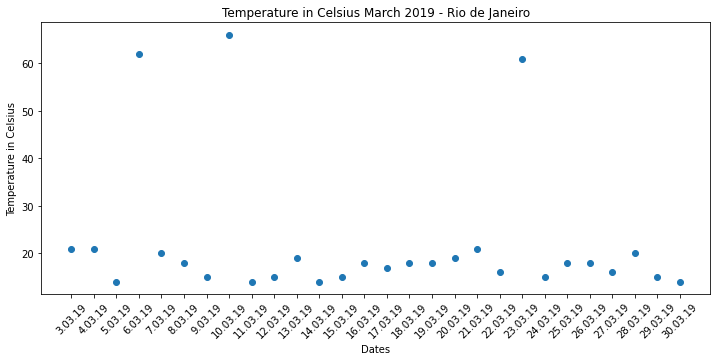

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(x="Date", y="Temperature", data=df_temperatures)

plt.title("Temperature in Celsius March 2019 - Rio de Janeiro")
plt.xlabel("Dates")
plt.ylabel("Temperature in Celsius")
plt.xticks(rotation=45)

# Show plot
plt.show()

#### Converting all temperatures to °C

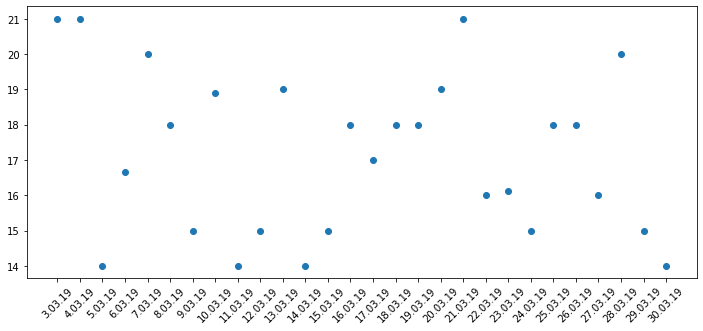

In [30]:
# Converting all temperatures to °C

# We assume that above 45 is already °F, because 45°C is a good maximum baseline
temp_fah = df_temperatures.loc[df_temperatures["Temperature"] > 45, "Temperature"]
temp_cels = (temp_fah - 32) * (5/9)
df_temperatures.loc[df_temperatures["Temperature"] > 45, "Temperature"] = temp_cels

# Assert conversion is correct
assert df_temperatures['Temperature'].max() < 45

plt.figure(figsize=(12,5))
plt.scatter(x="Date", y="Temperature", data=df_temperatures)
plt.xticks(rotation=45)
plt.show()

### Datetime formatting

| **Date**            | **```datetime``` format**   |
|:-------------------:|:---------------------------:|
| 25-12-2019          | ```%d-%m-%Y```              |
| December 25th 2019  | ```%c```                    |
| 12-25-2019          | ```%m-%d-%Y```              |
| ...                 | ...                         |

Command: ```pandas.to_datetime()```


### Treating date data

In [ ]:
"""
Try to convert to datetime - Won't work!

'Birthday' column has multiple formats, especially weird day/day/format
which triggers an error with months.
"""
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])

In [ ]:
"""
Try to convert to datetime - It works!

The parameters tell the datetime convertion to try to infer the date format
and for those unknown datetimes returns missing values (NA)
"""
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
                                       infer_datetime_format=True, # Attempt to infer format of each date
                                       errors='coerce' # Return NA for rows where conversion failed
                                       )

In [ ]:
# Define a new datetime format: day-month-year
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime("%d-%m-%Y")

### Exercise

#### Creating dataset

In [33]:
# Exercise
import pandas as pd

filename = 'banking_dirty.csv'
banking = pd.read_csv(filepath + filename, index_col=0)
acct_cur = ['dollar', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar',
       'euro', 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'euro',
       'dollar', 'dollar', 'euro', 'euro', 'dollar', 'euro', 'dollar',
       'dollar', 'euro', 'euro', 'euro', 'dollar', 'dollar', 'euro',
       'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar',
       'dollar', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar',
       'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar',
       'euro', 'dollar', 'dollar', 'euro', 'euro', 'euro', 'euro',
       'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar',
       'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar',
       'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'dollar',
       'dollar', 'euro', 'dollar', 'euro', 'euro', 'euro', 'dollar',
       'dollar', 'dollar', 'dollar', 'euro', 'euro', 'euro', 'dollar',
       'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar',
       'dollar', 'euro', 'euro', 'euro']
banking['acct_cur'] = acct_cur

banking.head(4)
#banking.columns


,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,dollar
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,dollar
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,dollar
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,euro


#### Convert Euro to Dollar

In [ ]:
# Convert Euro to Dollar

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Print unique values of acct_cur
assert banking['acct_cur'].unique() == 'dollar'

print(banking.loc[:, ['acct_amount','acct_cur']])

    acct_amount acct_cur
0     63523.310   dollar
1     38175.460   dollar
2     59863.770   dollar
3     92545.310   dollar
4    132563.200   dollar
..          ...      ...
95    12209.840   dollar
96    92838.440   dollar
97   102025.957   dollar
98    46136.453   dollar
99   109439.671   dollar

[100 rows x 2 columns]


## Cross Field Validation

* The use of multiple fields in a dataset to sanity check data and make sure to have strong data integrity.

### An example with flights dataset

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/cross-field-validation-flight_dataframe.PNG)

In [ ]:
# The flights example: Make sure that columns total_passengers is correct

import pandas as pd
flights = pd.read_csv('flights.csv')

# Subset columns then do a row wise summing ('axis' parameter set to 1)
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)

# Find instances where the total passengers columns is equal to the sum of the classes
passenger_equ = sum_classes == flights['total_passengers']

# Find and filter out rows with inconsistent passengers
inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

### An example with birthdays dataset

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/cross-field-validation-birthdays_dataframe.PNG)

In [ ]:
# The birthdays dataset: Make sure that the birthday dates are correct

import pandas as pd
import datetime as dt
users = pd.read_csv('user_birthdays.csv')

# Convert to datetime and get today's date
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()

# For each row in the Birthday column, calculate year difference
age_manual = today.year - users['Birthday'].dt.year

# Find instances where ages match
age_equ = age_manual == users['Age']

# Find and filter out rows with inconsistent age
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

### What to do when we catch inconsistencies?

* Dropping Data
* Set to missing and impute
* Apply rules from domain knowledge

### Exercises

* ```banking``` dataset

#### Finding total funds investiments inconsistencies

In [34]:
# Finding total funds investiments inconsistencies
# 'inv_amount' must be equal to the sum of 'fund_A', 'fund_B', 'fund_C', 'fund_D'
import pandas as pd
#pd.options.mode.chained_assignment = None

filename = 'banking_dirty.csv'
banking = pd.read_csv(filepath + filename, index_col=0)

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]
inconsistent_inv['sum'] = inconsistent_inv[fund_columns].sum(axis=1)
inconsistent_inv['dif'] = inconsistent_inv['sum'] - inconsistent_inv['inv_amount']

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0], "\n")
print(inconsistent_inv[['fund_A', 'fund_B', 'fund_C', 'fund_D', 'inv_amount', 'sum', 'dif']])

Number of inconsistent investments:  8 

      fund_A    fund_B    fund_C    fund_D  inv_amount       sum      dif
4   12158.40  51281.00  13434.00  18383.00       93230  95256.40  2026.40
12  18314.00   1477.00  29049.48   5539.00       50812  54379.48  3567.48
22   8206.00  15019.00   5559.60   6182.00       33927  34966.60  1039.60
43    314.00   6072.28  14163.00   7908.00       27531  28457.28   926.28
47  33764.00   5042.00  10659.00  19237.41       66796  68702.41  1906.41
65  28615.00  21720.05  11906.00  10763.00       70171  73004.05  2833.05
89   8489.36  28592.00   2439.00  30419.00       68466  69939.36  1473.36
92   6467.00  20861.00   9861.00  26004.16       60407  63193.16  2786.16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Finding age insconsistencies

In [35]:
# Finding age insconsistencies
# 'age' must be equal to the calculated age based on the 'birth_date' to the current year
import pandas as pd
import datetime as dt

filename = 'banking_dirty.csv'
banking = pd.read_csv(filepath + filename, index_col=0)
banking["birth_date"] = pd.to_datetime(banking["birth_date"])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0], "\n")
print(inconsistent_ages[["birth_date", "Age"]])

Number of inconsistent ages:  8 

   birth_date  Age
2  1990-09-12   34
8  1975-06-05   49
12 1990-11-20   34
23 1968-09-27   56
32 1961-08-14   63
54 1988-12-19   36
61 1975-01-12   49
85 1974-05-14   50


## Completeness

* Occurs when no data value is stored for a variable in an observation
* Can be represented as ```NA```, ```nan```, ```0```, ```.```, ...
* May happen due to technical error or human error

### Airquality example

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/completeness-airquality-example.PNG)

### Missingno package
* Useful package for visualizing and understanding missing data

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(airquality)
plt.show()

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/completeness-airquality-missingno.PNG)

### Airquality example

In [ ]:
# Airquality example

import pandas as pd
airquality = pd.read_csv('airquality.csv')

# Return missing values
print(airquality.isna())

# Get summary of missingness
airquality.isna().sum()

# Isolate missing and complete values aside
missing = airquality[airquality['CO2'].isna()]
complete = airquality[~airquality['CO2'].isna()]

sorted_airquality = airquality.sort_values(by = 'Temperature')
msno.matrix(sorted_airquality)
plt.show()

#### Missing data

All the missing data is on the top of the 'CO2' columns

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/completeness-airquality-sorted.PNG)

Checking the constents of DataFrames 'complete' and 'missing' we can see that missing values are from very low temperatures. This problem may be a sensor problem!

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/completeness-airquality-missing-complete.PNG)

### Missing types

* **Missing Completely at Random (MCAR)**
  * No systematic relationship between misisng data an other values
  * E.g.: Data entry errors when inputting data
* **Missing at Random (MAR)**
  * Systemic relationship between missing data and other **observed** values
  * E.g.: Missing ozone data for high temperatures
* **Missing Not at Random (MNAR)**
  * Systematic relationship between misisng data and **unobserved** values
  * E.g.: Missing temperature values for high temperatures

### How to deal with missing data? 

**Simple approaches:**
1. Drop missing data
2. Impute with statistical measures (mean, median, mode..)

**More complex approaches:**
1. Imputing using an algorithmic approach
2. Impute with machine learning models

### Dealing with missing data

* Dropping missing values
* Replacing with statistical measures

#### Drop missing values - Drop 'NA' values

In [ ]:
# Drop missing values - Drop 'NA' values
airquality_dropped = airquality.dropna(subset = ['CO2'])
airquality_dropped.head()

#### Replacing with statistical measures - Replace 'NA' by co2_mean

In [ ]:
# Replacing with statistical measures - Replace 'NA' by co2_mean
co2_mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2': co2_mean})
airquality_imputed.head()

### Exercise
* banking dataset

#### Find missing data and print

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          12
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
dtype: int64


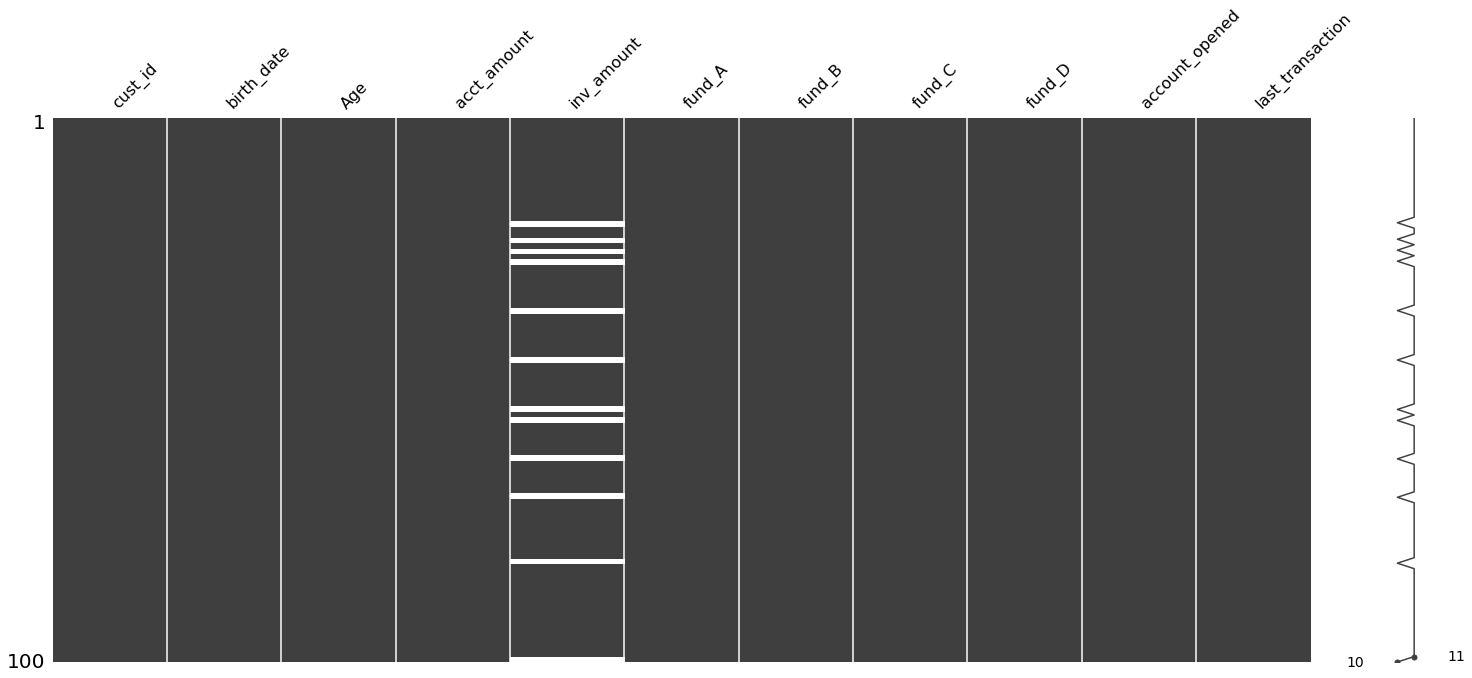

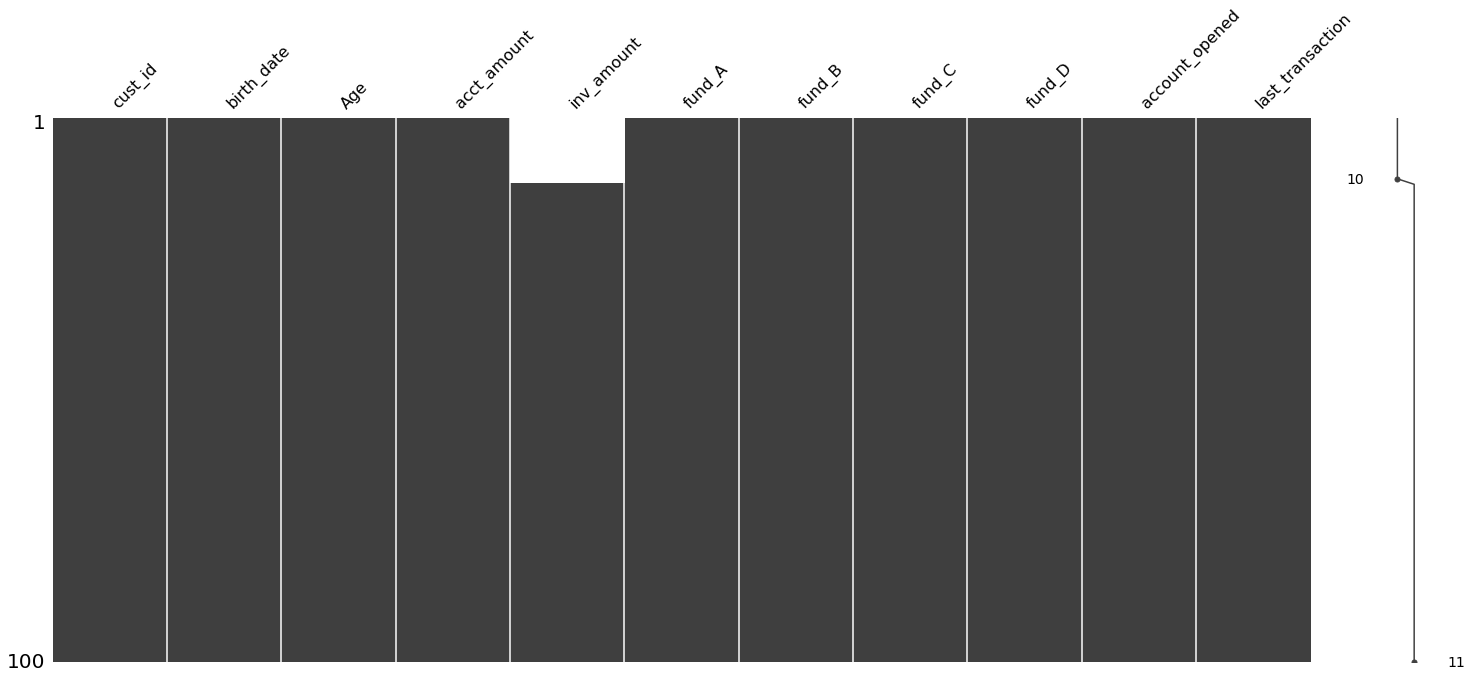

In [36]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Force 'inv_amount' to 'NA' for investor with less than 30 years
def force_na(df):
    np.random.seed(1000)
    index_na = [i for i in range(0,100) if df.iloc[i,2] < 30]
    
    for i in index_na:
        df.iloc[i,4] = np.nan 

    return df

filename = 'banking_dirty.csv'
banking = pd.read_csv(filepath + filename, index_col=0)
banking = force_na(banking)

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

In [ ]:
# Does not execute
# banking dataset

"""
Follow the money

In this exercise, you're working with another version of the banking DataFrame that contains missing 
values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by 
customers and more. You know that rows with missing cust_id don't really help you, and that on average 
acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of 
acct_amount with some domain knowledge.
"""

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

# Chapter 4: Record linkage
Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

## Comparing strings

### Minimum edit distance

* Minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:
  * **Insertion** of a new character.
  * **Deletion** of an existing character.
  * **Substitution** of an existing character.
  * **Transposition** of two existing consecutive characters.
* The lower the edit distance, the closer the two words are.
* Some algorithms
  * Damerau-Levenshtein: insertion, substitution, deletion, transposition
  * Levenshtein: insertion, substitution, deletion
  * Hamming: substitution only
  * Jaro: transposition only
* Packages: `nltk` , `fuzzywuzzy` , `textdistance`


<br>

* E.g.: 
  
  I N T E N T I O N <br>
  E X E C U T I O N <br>

  The minimum edit distance between them is the least possible amount of steps that could get us from the word intention to execution. The operations we have to make are:

  1. Delete the first I from Intention
  2. Insert C between E and N
  3. Substitute first N with E
  4. Substitute first T with X
  5. Substitute second N with U

  Then we go from Intention to Execution. The **minimum edit distance** is `5`.

### Fuzzywuzzy package

#### Performing simple string comparison

In [ ]:
!pip install fuzzywuzzy

# Lets us compare between two strings
from fuzzywuzzy import fuzz

# Compare reeding vs reading
print(fuzz.WRatio('Reeding', 'Reading'))

86


#### Partial strings and different orderings

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

# Partial string comparison
print(fuzz.WRatio('Houston Rockets', 'Rockets'))

# Partial string comparison with different order
print(fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets'))

90
86


#### Comparison with arrays

In [ ]:
import pandas as pd
from fuzzywuzzy import process

# Define string and array of possible matches
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
                     'Houson vs Los Angeles', 'Heat vs Bulls'])

print(process.extract(string, choices, limit = 2))

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]


### Collapsing categories with string similarity

* Use `.replace()` to collapse `"eur"` into `"Europe"`

* What if there are too many variations? <br>
  `"EU"` , `"eur"` , `"Europ"` , `"Europa"` , `"Erope"` , `"Evropa"` ...

  We can use string similarity.

### Collapsing categories with string matching

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/categories-similarity.PNG)

* Too many dofferent typos
* Use case for string similarity
* We can collapse the incorrect categories with string matching.

### Collapsing all of the state

In [ ]:
# For each correct category
for state in categories['state']:  
    # Find potential matches in states with typoes
    matches = process.extract(state, survey['state'], limit = survey.shape[0])    
    # For each potential match match
    for potential_match in matches:
        # If high similarity score
        if potential_match[1] >= 80:
            # Replace typo with correct category
            survey.loc[survey['state'] == potential_match[0], 'state'] = state

### Exercise 1
* Using the restaurants dataset
* Goal: Create a restaurant recommendation engine.
  * First we have to clean the data
  * Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's `process.extract()` function by finding the similarity score of the most distant typo of each category.

In [37]:
!pip install fuzzywuzzy

import pandas as pd
from fuzzywuzzy import process

restaurants = pd.read_csv(filepath + 'restaurants_fuzzywuzzy.csv', index_col=0)

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit=len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit=len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit=len(unique_types)))

"""
By the output we can conclude that the sweet spot is 80, where you convert all incorrect
typos without remapping incorrect categories. Often times though, you may need to combine 
the techniques learned in chapter 2, especially since there could be strings that make it 
beyond our cutoff point, but are not actually a match!
"""

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), (

'\nBy the output we can conclude that the sweet spot is 80, where you convert all incorrect\ntypos without remapping incorrect categories. Often times though, you may need to combine \nthe techniques learned in chapter 2, especially since there could be strings that make it \nbeyond our cutoff point, but are not actually a match!\n'

### Exercise 2
* Using restaurants dataset
* Goal: Find matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. 
  * Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each of tuple is as such:

  `(closest match, similarity score, index of match)`

In [ ]:
!pip install fuzzywuzzy

import pandas as pd
from fuzzywuzzy import process

restaurants = pd.read_csv(filepath + 'restaurants_cuisine_type.csv', index_col=0)
categories = ['asian', 'american', 'italian']

# All cuisine types
print(restaurants['cuisine_type'].unique())

# For each correct cuisine_type in categories
for cuisine in categories:
  # Find matches in cuisine_type of restaurants
  matches = process.extract(cuisine, restaurants['cuisine_type'], 
                            limit=restaurants.shape[0])
  # For each possible_match with similarity score >= 80
  # possible_match format : (closest match, similarity score, index of match)
  for possible_match in matches:
    if possible_match[1] >= 80:
      # Find matching cuisine type. Select rows where possible_match[0] will become 'cuisine'
      matching_cuisine = restaurants['cuisine_type'] == possible_match[0]
      restaurants.loc[matching_cuisine, 'cuisine_type'] = cuisine

# Print unique values to confirm mapping
print(restaurants['cuisine_type'].unique())

## Generating pairs

* **Motivation**
  * We want merge two or more DataFrames together, containing only one DataFrame with unique registries.
  * E.g.: 
 
![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/generating-pairs-motivation.png)

  * The red lines are the duplicated values and the non duplicate values are marked in green.
  * A regular join will not work, because duplicated values do not share a common unique identifier between DataFrames.


#### Record linkage

* Similar to joins, record linkage is the act of linking data from different sources regarding the same entity.
* But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.


![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/record-linkage.PNG)

* Generally, we clean two or more DataFrames, generate pairs of potentially matching records, score these pairs according to string similarity and other similarity metrics, and link them.
* All these steps can be achieved with the `recordlinkage` package

* E.g.: Given two DataFrames we want to merge them while avoiding duplication using record linkage, since they are collected manually and are prone to types, and there are no consistent IDs between them.
  * We could generate all possible pairs between the data, but it may lead to too much pairs. It wouldn't prove scalable and could seriously hamper development time
  * We apply **blocking**, which creates pairs based on a matching column, reducing the number of possible pairs.

  ![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/generating-pairs-census.PNG)

In [ ]:
import recordlinkage

# Create indexing object : We can use it to generate pairs from our DataFrames
indexer = recordlinkage.Index()

# Generate pairs blocked on state
indexer.block('state')
pairs = indexer.index(census_A, census_B)

The result of the code above is a multi index object containing pairs of row indices from both DataFrames, that is, an array containing possible pairs of indices that makes it much easier to subset DataFrames on.

In [ ]:
# Looking for potencial matches

# Generate the pairs
pairs = indexer.index(census_A, census_B)

# Create a Compare object : It is responsable for assigning different comparison procedures for pairs.
compare_cl = recordlinkage.Compare()

""" Find exact matches for pairs of date_of_birth and state : We specify the column name in question 
for each DataFrame, which is in this case 'date_of_birth' and 'state', and a label argument which lets 
us set the column name in the resulting DataFrame """
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('state', 'state', label='state')

# Find similar matches for pairs of surname and address_1 using string similarity
compare_cl.string('surname', 'surname', threshold=0.85, label='surname')
compare_cl.string('address_1', 'address_1', threshold=0.85, label='address_1')

# Find matches : Takes the possible pairs and the two DataFrames in question
potential_matches = compare_cl.compute(pairs, census_A, census_B)

In the code above it is important to always have the same order of DataFrames when inserting them as arguments when generating pairs, comparing between columns, and computing comparisons.

The output is a multi index DataFrame where the first index is the row index from the first DataFrame, or census A, and the second index is a list of all row indices in census B.

The columns are the columns being compared, with values being 1 for a match, and 0 for not a match.

#### Finding the only pairs we want

```potential_matches[potential_matches.sum(axis = 1) => 2]```

To find potential matches, we just filter for rows where the sum of row values is higher than a certain threshold, which in this case is higher or equal to 2.

### Exercise 1
* Generating pairs

In [39]:
!pip install recordlinkage

import pandas as pd
import recordlinkage 

restaurants = pd.read_csv(filepath + 'restaurants_generate_pairs.csv', index_col=0)
restaurants_new = pd.read_csv(filepath + 'restaurants_new.csv', index_col=0)
restaurants.columns = ['rest_name', 'rest_addr', 'city', 'phone', 'cuisine_type']
restaurants_new.columns = ['rest_name', 'rest_addr', 'city', 'phone', 'cuisine_type']

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Remaining steps: Compare between columns, score the comparison, then link the DataFrames.

     |████████████████████████████████| 952kB 3.4MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 


### Exercise 2
* Finding exact matches in the 'city' and 'cuisine_type' columns between each pair, and similar strings for each pair in the 'rest_name' column.

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_type 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold=0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


In [ ]:
"""
The minimum number of columns of matching to ensure a proper duplicate find is 3,
because I need to have matches in all my columns.
"""

potential_matches[potential_matches.sum(axis=1) >= 3]

,,city,cuisine_type,name
0,40,1,1,1.0
1,28,1,1,1.0
2,74,1,1,1.0
3,1,1,1,1.0
4,53,1,1,1.0
8,43,1,1,1.0
9,50,1,1,1.0
13,7,1,1,1.0
14,67,1,1,1.0
17,12,1,1,1.0


## Linking DataFrames

From the previous example we have the `potential_matches`:

![](https://raw.githubusercontent.com/jlggross/learning/master/Pandas/Data%20Cleaning%20in%20Python/link-data-potencial-matches.PNG)

* The indices are from the two DataFrames we worked on.
* The columns of our potencial matches are the columns we chose to link both DataFrames on, where the valu is 1 for a match, and 0 otherwise.

#### Probable matches

* The first step in linking DataFrames, is to isolate the potentially matching pairs to the ones we-re pretty sure of.

```
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]
print(matches)
```



In [ ]:
# Import recordlinkage and generate pairs and compare across columns
...

# Generate potential matches
potential_matches = compare_cl.compute(full_pairs, census_A, census_B)

# Isolate matches with matching values for 3 or more columns : We ensure to tighten our
# search for duplicates across both DataFrames before we link them
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get index for matching census_B rows only, where there are duplicates
# We use 'get_level_values()' because the index is multi level
duplicate_rows = matches.index.get_level_values(1)

# Finding new rows in census_B where they are not duplicated with census_A by using the tilde symbol
census_B_new = census_B[~census_B.index.isin(duplicate_rows)]

# Link the DataFrames!
full_census = census_A.append(census_B_new)

### Exercise 1
* Uses variable `potencial_matches`, already calculated in Exercise 2 from Getting Pairs.
* Goal: Link `restaurants` and `restaurants_new` DataFrames. 
  * First we have to extract all row indices of `restaurants_new` that are matching across the columns mentioned above from `potential_matches`. 
  * Then we will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)

full_restaurants

,rest_name,rest_addr,city,phone,cuisine_type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...
76,don,1136 westwood blvd.,westwood,3102091422,italian
77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


# Conclusion

* In this course we learned:
  * How to diagnose dirty data, identify the side effects of dirty data, and learned how to clean data.
  * In Chapter 1, we learned about basic data cleaning problems such as fixing incorrect data types, making sure our data sticks within range, and dropping duplicates.
  * In Chapter 2, we learned about common problems affecting categorical and text data.
  * In Chapter 3, we learned about more advanced data problems, such as unifying differently formatted data, cross field validation and completeness.
  * Finally, in Chapter 4, we learned how to link datasets where joins don't work, by learning about **record linkage**.